In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR

In [2]:
#匯入資料

import pandas as pdS
data = pd.read_csv('C:/Users/liping/OneDrive/文件/學校資料/碩一上/資料探勘/Hw/dataminingHW2/SeoulBikeDataDel.csv', na_values = '?' )
data = data.dropna()
X = data.drop(["Rented Bike Count"], axis=1)
y = data["Rented Bike Count"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X
#scaler = StandardScaler()
#scaler.fiSt(X)
#scaled_features = scaler.transform(X)
#X = pd.DataFrame(scaled_features, columns=data.columns[:-1])

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [3]:
#正規化
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler #標準化
ss_x = StandardScaler()
ss_y = StandardScaler()
x_train = ss_x.fit_transform(X_train)
x_test = ss_x.fit_transform(X_test)


#建立SVR
svr_rbf = SVR(C=3, kernel='rbf', gamma='auto')
svr_rbf.fit(x_train,y_train)
svr_predict=svr_rbf.predict(x_train)
print(svr_rbf.score(x_train,y_train))
print(svr_rbf.score(x_test,y_test))

0.5213502760218787
0.5000495646734048


In [4]:
MSE = metrics.mean_squared_error(y_train, svr_predict)
RMSE = metrics.mean_squared_error(y_train, svr_predict)**0.5
MAE = metrics.mean_absolute_error(y_train, svr_predict)
MAPE = metrics.mean_absolute_percentage_error(y_train, svr_predict)

print("RMSE:%.2f" %RMSE)
print("MAE:%.2f" %MAE)
print("MAPE:%.2f" %MAPE,"%")

RMSE:446.12
MAE:300.57
MAPE:116508348062406752.00 %


In [5]:
from sklearn.inspection import permutation_importance
results = permutation_importance(svr_rbf, x_test, y_test, n_repeats=30, random_state=0)
importance = results.importances_mean

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.2f' % (i,v))

Feature: 0, Score: 0.19
Feature: 1, Score: 0.21
Feature: 2, Score: 0.07
Feature: 3, Score: 0.01
Feature: 4, Score: 0.03
Feature: 5, Score: 0.10
Feature: 6, Score: 0.02
Feature: 7, Score: 0.02
Feature: 8, Score: 0.02


In [6]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.9f' % (i,v))

Feature: 0, Score: 0.189040479
Feature: 1, Score: 0.208217734
Feature: 2, Score: 0.074079561
Feature: 3, Score: 0.013133994
Feature: 4, Score: 0.029157310
Feature: 5, Score: 0.104905249
Feature: 6, Score: 0.020344935
Feature: 7, Score: 0.020912923
Feature: 8, Score: 0.019578430


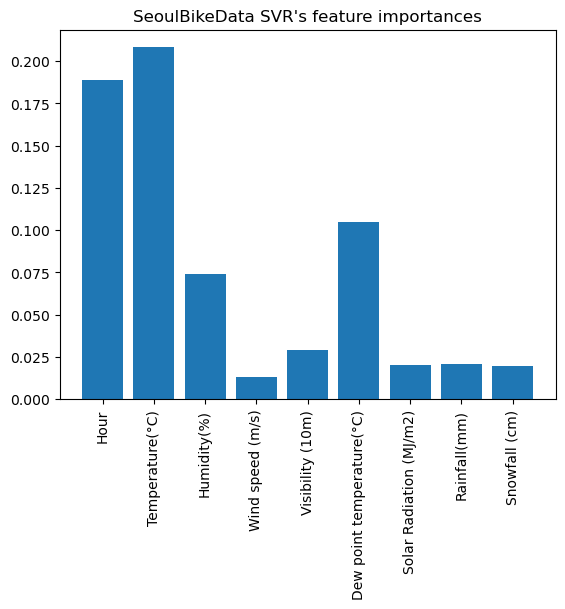

In [7]:
# plot
plt.bar(range(len(importance)), importance)
x = [0,1,2,3,4,5,6,7,8,]
plt.title('SeoulBikeData SVR\'s feature importances')
x_labels = ['Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']
plt.xticks(x,x_labels,rotation ='vertical')
plt.show()

In [8]:
#刪除特徵值
x_train_DEL= X_train.drop(['Hour','Temperature(°C)'], axis=1)
x_test_DEL= X_test.drop(['Hour','Temperature(°C)'], axis=1)

In [9]:
#正規化
ss_x = StandardScaler()
ss_y = StandardScaler()
x_train_DEL_N = ss_x.fit_transform(x_train_DEL)
x_test_DEL_N = ss_x.fit_transform(x_test_DEL)

In [10]:
#建立SVR
svr2 = SVR(C=3, kernel='rbf', gamma='auto')
svr2.fit(x_train_DEL_N,y_train)
svr2_predict=svr2.predict(x_train_DEL_N)
print(svr2.score(x_train_DEL_N,y_train))
print(svr2.score(x_test_DEL_N,y_test))

0.3455225471705178
0.34127333772881374


In [11]:
MSE = metrics.mean_squared_error(y_train, svr2_predict)
RMSE = metrics.mean_squared_error(y_train, svr2_predict)**0.5
MAE = metrics.mean_absolute_error(y_train, svr2_predict)
MAPE = metrics.mean_absolute_percentage_error(y_train, svr_predict)

print("RMSE:%.2f" %RMSE)
print("MAE:%.2f" %MAE)
print("MAPE:%.2f" %MAPE,"%")

RMSE:521.67
MAE:354.89
MAPE:116508348062406752.00 %
